In [31]:
from qwind import wind
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
import pandas as pd
%matplotlib inline
from matplotlib.colors import LogNorm
from glob import glob
import os
from qwind import constants
from pyagn import sed
from scipy.optimize import curve_fit
import importlib
import plotting
importlib.reload(plotting)

<module 'plotting' from '/cosma7/data/dp004/dc-quer1/qwind/Notebooks/plotting.py'>

In [90]:
from pyagn import sed

In [92]:
asd = sed.SED(M=1e8, mdot = 0.5)
asd.xray_fraction

0.15250548492438915

In [32]:
M_range = np.geomspace(1e7,1e9,11)
print(M_range)
mdot_range = np.geomspace(0.05,1,10)
mdot_range

[1.00000000e+07 1.58489319e+07 2.51188643e+07 3.98107171e+07
 6.30957344e+07 1.00000000e+08 1.58489319e+08 2.51188643e+08
 3.98107171e+08 6.30957344e+08 1.00000000e+09]


array([0.05      , 0.06974754, 0.09729439, 0.13572088, 0.18932395,
       0.2640976 , 0.36840315, 0.51390427, 0.71687116, 1.        ])

In [33]:
M = 1e8
mdot = 0.1
rho = 2e8
print("%e, %f " %(M,mdot))

1.000000e+08, 0.100000 


In [35]:
test = wind.Qwind(M=M, mdot = mdot, n_cpus = 4, nr = 20, eta = 0.0313, rho_shielding = rho, modes = ['old_integral', 'old_sed'])

r_in: 200.000000 
 r_out: 1600.000000


In [36]:
test.start_lines(niter = 50000)

Starting line iteration
multiple cpus
Failed wind! 



escape velocity reached.
escape velocity reached.
Failed wind! 



out of grid 



out of grid 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 

Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 

Failed wind! 



Failed wind! 



Failed wind! 

Failed wind! 

Failed wind! 



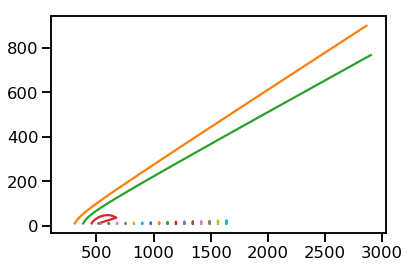

In [38]:
for line in test.lines:
    plt.plot(line.r_hist, line.z_hist)

In [39]:
def read_qwind_file(file):
    df = pd.read_csv(file, sep = "\s+", skiprows=1,  names =['time', 'R', 'PHI', 'Z', 'Vz[km/s]', 'Ve[km/s]', 'fm', 'abs_uv', 'Vtot[km/s]', 'Tau_xt', 'xi_t', 'dv_dr[s]', 'd', 'tau_s', 'Fr_grav[cm/s^2]', 'fr_rad[cm/s^2]', 'L', 'Labs', 'iter', 'tau_eff','r_eff0','r_eff','tau_uv_t', 'Ir', 'Iz', 'tau_X'])
    return df

In [40]:
originals = glob("../../qwind_original/bin64/qw_paper/qwi*")

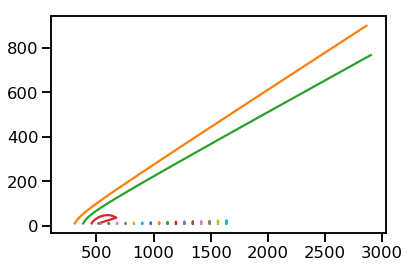

In [42]:
for line in test.lines:
    plt.plot(line.r_hist, line.z_hist)
#plt.xlim(0,1000)
#plt.ylim(0,100)

In [68]:
test.lines[1].escaped

True

In [81]:
asd = wind.Qwind(M=1e8, mdot = 0.5)

r_in: 200.000000 
 r_out: 1600.000000


In [84]:
A = 8 * np.pi * asd.Rg**2 * (400**2 - 200**2)
A

6.575996328521393e+32

In [85]:
rho =  2e8 * constants.m_p 

In [89]:
Mdot = A * rho * 1e7 
print(Mdot / constants.Ms * constants.year)

0.03491186721998649


In [80]:
Mdot / (test.bol_luminosity / (test.eta * constants.c**2))

0.24614288838393683

In [69]:
line = test.lines[1]

In [61]:
line.rho_hist[0]

200000000.0

In [60]:
print("%e"%line.rho_hist[-1])

8.669246e+08


(0, 100)

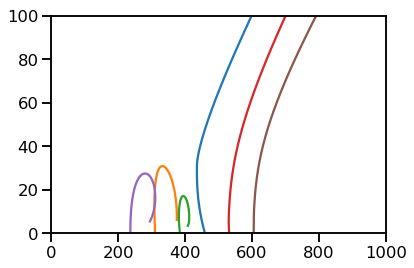

In [27]:
for file in originals:
    df = read_qwind_file(file)
    plt.plot(df.R, df.Z)
plt.xlim(0,1000)
plt.ylim(0,100)

In [29]:
originals

['../../qwind_original/bin64/qw_paper/qwind.dat04',
 '../../qwind_original/bin64/qw_paper/qwind.dat02',
 '../../qwind_original/bin64/qw_paper/qwind.dat03',
 '../../qwind_original/bin64/qw_paper/qwind.dat05',
 '../../qwind_original/bin64/qw_paper/qwind.dat01',
 '../../qwind_original/bin64/qw_paper/qwind.dat06']